In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [5]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap

plt.rcParams["font.size"] = 16

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

We are trying to assess the roles of different variables in predicting default payment (when a person defaults their credit card bills). We have feature variables such as basic identity features of clients (gender, education level etc.) and we have more quantitative variables such as the ordinal repayment status in several months, amount of bill statements (in dollars), and amount paid (in dollars) for several months, and limit balance.

My first few thoughts are that we should maybe drop columns like marriage status and gender since they do not really play a pivotal role and may affect the results, however we will consider this after initial exploratory data analysis.

In [3]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv", index_col=0)
credit_df.head()

NameError: name 'pd' is not defined

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
X = credit_df.drop(["default.payment.next.month"], axis=1)
y = credit_df["default.payment.next.month"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

<!-- END QUESTION -->

<br><br>

In [2]:
credit_df["default.payment.next.month"]

NameError: name 'credit_df' is not defined

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

Mean and Standard Deviation of LIMIT_BAL (Credit Amount): Summarizing LIMIT_BAL gives insights into the typical credit limit and variability, helping to understand financial exposure.

Class Distribution for default.payment.next.month: Showing the proportion of clients who default provides context for class imbalance, a critical consideration for model evaluation.

Histogram of AGE: A histogram shows age distribution, useful for understanding the demographic makeup and possible relationships with default likelihood.

Boxplot of BILL_AMT1 by Default Status: A boxplot can reveal trends in outstanding bill amounts and their link to default, possibly identifying financial strain.

Mean and Standard Deviation of LIMIT_BAL:
167880.65142857144 130202.68216737211

Class Distribution in y_train:
default.payment.next.month
0    0.776762
1    0.223238
Name: proportion, dtype: float64


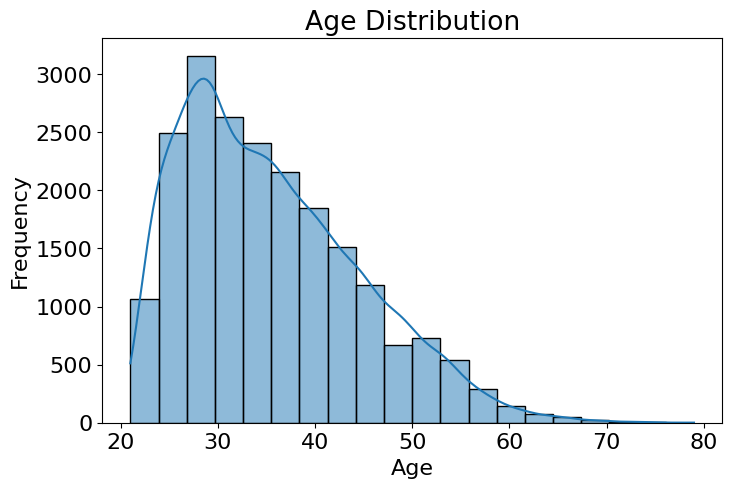

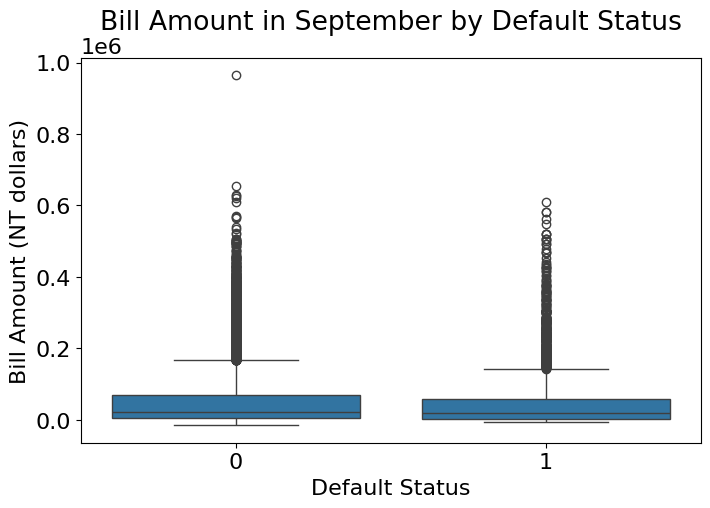

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Summary statistics
print("Mean and Standard Deviation of LIMIT_BAL:")
print(X_train["LIMIT_BAL"].mean(), X_train["LIMIT_BAL"].std())

# Class distribution
print("\nClass Distribution in y_train:")
print(y_train.value_counts(normalize=True))

# Visualization: Age histogram
plt.figure(figsize=(8, 5))
sns.histplot(X_train["AGE"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Visualization: Boxplot of BILL_AMT1 by Default Status
plt.figure(figsize=(8, 5))
sns.boxplot(x=y_train, y=X_train["BILL_AMT1"])
plt.title("Bill Amount in September by Default Status")
plt.xlabel("Default Status")
plt.ylabel("Bill Amount (NT dollars)")
plt.show()

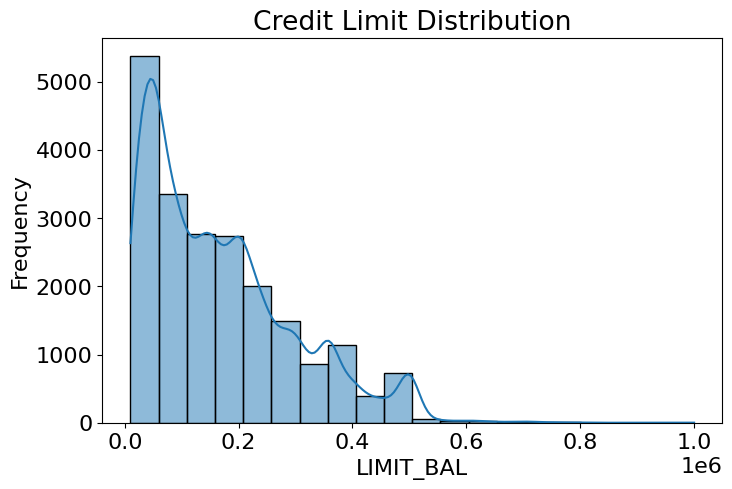

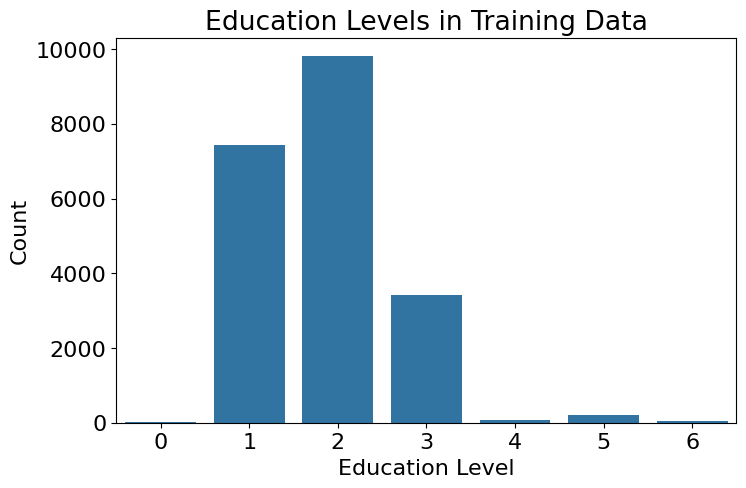

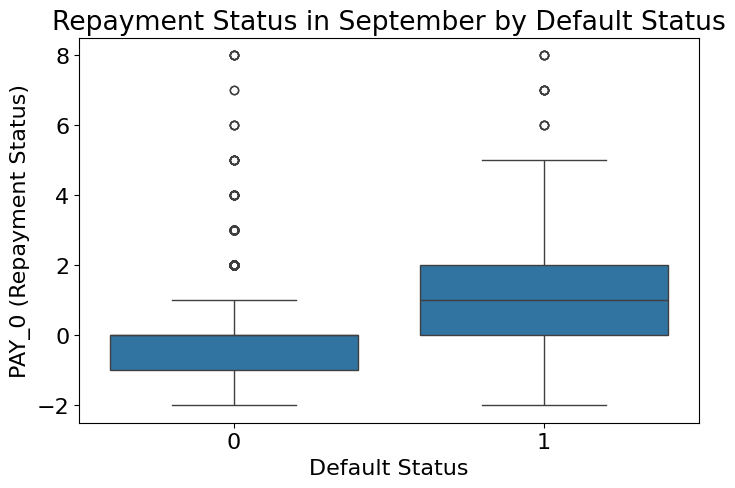

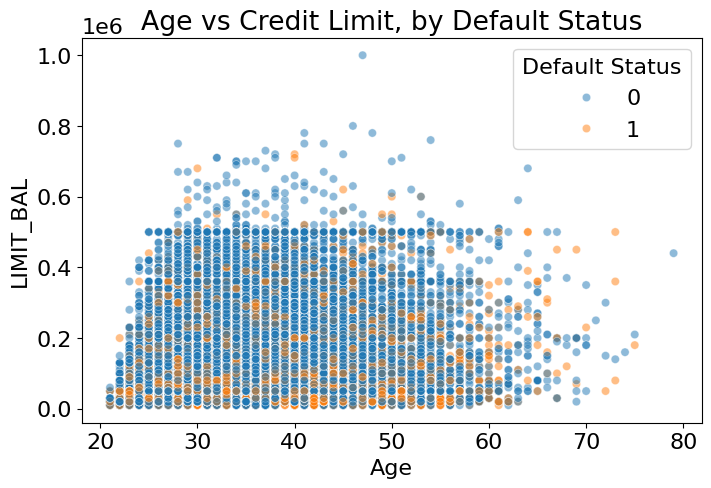

In [6]:
# Visualization: Histogram of LIMIT_BAL
plt.figure(figsize=(8, 5))
sns.histplot(X_train["LIMIT_BAL"], bins=20, kde=True)
plt.title("Credit Limit Distribution")
plt.xlabel("LIMIT_BAL")
plt.ylabel("Frequency")
plt.show()

# Visualization: Bar plot of EDUCATION
plt.figure(figsize=(8, 5))
sns.countplot(x=X_train["EDUCATION"])
plt.title("Education Levels in Training Data")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

# Visualization: Boxplot of PAY_0 (September repayment status) by Default Status
plt.figure(figsize=(8, 5))
sns.boxplot(x=y_train, y=X_train["PAY_0"])
plt.title("Repayment Status in September by Default Status")
plt.xlabel("Default Status")
plt.ylabel("PAY_0 (Repayment Status)")
plt.show()

# Visualization: Scatter plot of AGE vs LIMIT_BAL, colored by Default Status
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_train["AGE"], y=X_train["LIMIT_BAL"], hue=y_train, alpha=0.5)
plt.title("Age vs Credit Limit, by Default Status")
plt.xlabel("Age")
plt.ylabel("LIMIT_BAL")
plt.legend(title="Default Status")
plt.show()

In [7]:
display(X_train["AGE"].mean())
display(X_train["AGE"].median())

35.50080952380952

34.0

In [8]:
X_train["MARRIAGE"].value_counts()

MARRIAGE
2    11210
1     9527
3      229
0       34
Name: count, dtype: int64

In [9]:
X_train["EDUCATION"].value_counts()

EDUCATION
2    9815
1    7433
3    3416
5     210
4      81
6      35
0      10
Name: count, dtype: int64

1. For the sex, we can observe that there is a sufficient amount of representation for both male and female, but there is about 4000 more samples for female than male.
2. The education is majority university level, with some at graduate school and fewer with high school education. Since 5 and 6 are both 'unknown', we may combine them at a later step.
3. Average age seems to be 35.5, with most ages being in 20s and 30s, but ranging all the way up to 70s and 80s.

<Axes: xlabel='default.payment.next.month'>

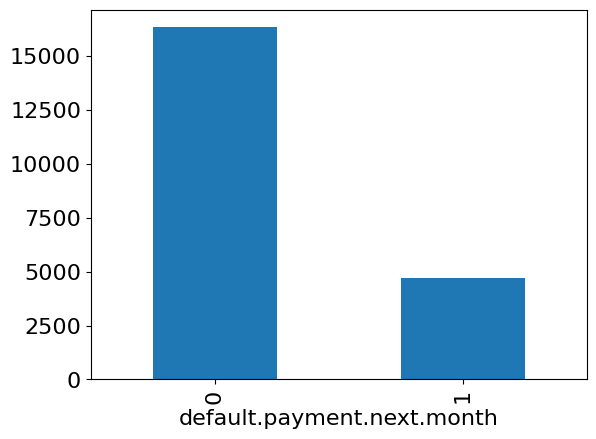

In [10]:
y_train.value_counts().plot(kind = "bar")

There seems to be class imbalance based on the proportions of default.payment.next.month, with 0.777 having no payment next month and 0.223 having payment next month. This means that a dummy classifier that just predicts '0' would have reasonable accuracy.

Metrics

Primary: F1 score, Since “will-default” is our positive class, missing a “will-default” is considered a “false negative”. Since, we want to minimize false negatives we should focus on the recall and F1 metric to see the best performance.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

We are averaging all the bill amounts into one feature, as well as the pay amounts into one feature. This is to reduce dimensionality to prevent problems associated with the 'curse of dimensionality'.

In [11]:
credit_df["AVG_BILL_AMT"] = credit_df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].mean(axis=1)
credit_df["AVG_PAY_AMT"] = credit_df[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].mean(axis=1)

X = credit_df.drop(columns=['default.payment.next.month', "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"])
y = credit_df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16396 to 19967
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LIMIT_BAL     21000 non-null  float64
 1   SEX           21000 non-null  int64  
 2   EDUCATION     21000 non-null  int64  
 3   MARRIAGE      21000 non-null  int64  
 4   AGE           21000 non-null  int64  
 5   PAY_0         21000 non-null  int64  
 6   PAY_2         21000 non-null  int64  
 7   PAY_3         21000 non-null  int64  
 8   PAY_4         21000 non-null  int64  
 9   PAY_5         21000 non-null  int64  
 10  PAY_6         21000 non-null  int64  
 11  AVG_BILL_AMT  21000 non-null  float64
 12  AVG_PAY_AMT   21000 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 2.2 MB


In [13]:
numeric_features = ['LIMIT_BAL', 'AGE', 'AVG_BILL_AMT', 'AVG_PAY_AMT']
drop_features = ['SEX'] #unethical?
categorical_features = ['MARRIAGE']
education_features = ['EDUCATION']
ordinal_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

X_train["EDUCATION"] = X_train["EDUCATION"].replace({6: 5, 0: 5})
X_test["EDUCATION"] = X_test["EDUCATION"].replace({6: 5, 0: 5})

In [14]:
ct = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('edu', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]), education_features),
        ('ord', OrdinalEncoder(categories=[[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]] * len(ordinal_features)), ordinal_features),
        ('onehot', OneHotEncoder(sparse_output = False, handle_unknown='ignore'), categorical_features),
        ('drop', "drop", drop_features),
    ]
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [15]:
## Adapted from CPSC330 Lecture 5
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """
    kwargs["return_train_score"] = True

    scoring = [
        "f1",
        "recall",
        "accuracy"]
    
    scores = cross_validate(model, X_train, y_train, scoring = scoring, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [16]:
from sklearn.dummy import DummyClassifier

# Baseline model with DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
pipe_dc = make_pipeline(ct, dummy_clf)

results_dict = mean_std_cross_val_scores(
    pipe_dc, X_train, y_train, return_train_score=True
)
pd.DataFrame(results_dict)

/var/folders/pm/c14xl5yx7qzcz2mygnggvt700000gn/T/ipykernel_97670/2826699723.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,0
fit_time,0.016 (+/- 0.010)
score_time,0.007 (+/- 0.003)
test_f1,0.000 (+/- 0.000)
train_f1,0.000 (+/- 0.000)
test_recall,0.000 (+/- 0.000)
train_recall,0.000 (+/- 0.000)
test_accuracy,0.777 (+/- 0.000)
train_accuracy,0.777 (+/- 0.000)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [17]:
results = []

# Perform cross-validation for each value of C
for C in 10.0 ** np.arange(-4, 6, 1):
    lr = LogisticRegression(C=C, max_iter=10000)
    pipe_lr = make_pipeline(ct, lr)
    lr_result = mean_std_cross_val_scores(pipe_lr, X_train, y_train)
    
    # Append C value to the result and convert to DataFrame row
    lr_result["C"] = C
    results.append(lr_result)

# Convert the list of results into a DataFrame
lr_result_df = pd.DataFrame(results)
lr_result_df

/var/folders/pm/c14xl5yx7qzcz2mygnggvt700000gn/T/ipykernel_97670/2826699723.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/pm/c14xl5yx7qzcz2mygnggvt700000gn/T/ipykernel_97670/2826699723.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/pm/c14xl5yx7qzcz2mygnggvt700000gn/T/ipykernel_97670/2826699723.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

,fit_time,score_time,test_f1,train_f1,test_recall,train_recall,test_accuracy,train_accuracy,C
0,0.273 (+/- 0.094),0.018 (+/- 0.009),0.047 (+/- 0.009),0.047 (+/- 0.003),0.024 (+/- 0.005),0.024 (+/- 0.002),0.780 (+/- 0.001),0.780 (+/- 0.000),0.0001
1,0.494 (+/- 0.330),0.030 (+/- 0.014),0.279 (+/- 0.021),0.279 (+/- 0.009),0.172 (+/- 0.015),0.173 (+/- 0.007),0.801 (+/- 0.004),0.801 (+/- 0.001),0.0010
2,0.344 (+/- 0.271),0.022 (+/- 0.017),0.348 (+/- 0.016),0.350 (+/- 0.008),0.229 (+/- 0.012),0.231 (+/- 0.007),0.809 (+/- 0.003),0.809 (+/- 0.001),0.0100
3,0.219 (+/- 0.112),0.009 (+/- 0.003),0.361 (+/- 0.016),0.361 (+/- 0.008),0.241 (+/- 0.013),0.241 (+/- 0.007),0.810 (+/- 0.003),0.810 (+/- 0.001),0.1000
4,0.185 (+/- 0.067),0.011 (+/- 0.005),0.362 (+/- 0.014),0.362 (+/- 0.009),0.241 (+/- 0.013),0.241 (+/- 0.008),0.810 (+/- 0.002),0.810 (+/- 0.001),1.0000
5,0.162 (+/- 0.064),0.021 (+/- 0.024),0.362 (+/- 0.015),0.362 (+/- 0.009),0.241 (+/- 0.013),0.241 (+/- 0.008),0.810 (+/- 0.002),0.810 (+/- 0.001),10.0000
6,0.151 (+/- 0.109),0.007 (+/- 0.003),0.362 (+/- 0.015),0.362 (+/- 0.009),0.241 (+/- 0.013),0.241 (+/- 0.008),0.810 (+/- 0.002),0.810 (+/- 0.001),100.0000
7,0.107 (+/- 0.028),0.010 (+/- 0.004),0.362 (+/- 0.015),0.362 (+/- 0.009),0.241 (+/- 0.013),0.241 (+/- 0.008),0.810 (+/- 0.002),0.810 (+/- 0.001),1000.0000
8,0.103 (+/- 0.027),0.009 (+/- 0.003),0.362 (+/- 0.014),0.362 (+/- 0.009),0.241 (+/- 0.013),0.241 (+/- 0.008),0.810 (+/- 0.002),0.810 (+/- 0.001),10000.0000
9,0.220 (+/- 0.074),0.016 (+/- 0.004),0.362 (+/- 0.014),0.362 (+/- 0.009),0.241 (+/- 0.013),0.241 (+/- 0.008),0.810 (+/- 0.002),0.810 (+/- 0.001),100000.0000


The linear model slightly improves on the dummy model, with the best train / test accuracy being 0.81. The best hyperparameter value for C seems to be 1.0, since it has the best accuracy combined with a quick fit and score time.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

In [18]:
from sklearn.tree import DecisionTreeClassifier

results = []

dt_scores_dict = {
    "max_depth": [1] + list(range(0, 50, 5))[1:] + [None],
}

for max_depth in dt_scores_dict["max_depth"]:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    pipe_dt = make_pipeline(ct, dt)
    dt_result = mean_std_cross_val_scores(pipe_dt, X_train, y_train)
    dt_result["max_depth"] = max_depth
    results.append(dt_result)

dt_result_df = pd.DataFrame(results)
dt_result_df

/var/folders/pm/c14xl5yx7qzcz2mygnggvt700000gn/T/ipykernel_97670/2826699723.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/pm/c14xl5yx7qzcz2mygnggvt700000gn/T/ipykernel_97670/2826699723.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/pm/c14xl5yx7qzcz2mygnggvt700000gn/T/ipykernel_97670/2826699723.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

,fit_time,score_time,test_f1,train_f1,test_recall,train_recall,test_accuracy,train_accuracy,max_depth
0,0.025 (+/- 0.012),0.008 (+/- 0.003),0.445 (+/- 0.018),0.445 (+/- 0.004),0.326 (+/- 0.015),0.326 (+/- 0.004),0.818 (+/- 0.006),0.818 (+/- 0.001),1.0
1,0.035 (+/- 0.002),0.006 (+/- 0.001),0.468 (+/- 0.013),0.487 (+/- 0.006),0.357 (+/- 0.013),0.371 (+/- 0.007),0.819 (+/- 0.004),0.826 (+/- 0.001),5.0
2,0.057 (+/- 0.002),0.006 (+/- 0.000),0.469 (+/- 0.012),0.580 (+/- 0.014),0.376 (+/- 0.012),0.464 (+/- 0.019),0.810 (+/- 0.007),0.850 (+/- 0.002),10.0
3,0.077 (+/- 0.002),0.006 (+/- 0.000),0.447 (+/- 0.019),0.729 (+/- 0.010),0.384 (+/- 0.022),0.620 (+/- 0.014),0.788 (+/- 0.006),0.897 (+/- 0.003),15.0
4,0.089 (+/- 0.004),0.007 (+/- 0.001),0.418 (+/- 0.008),0.867 (+/- 0.008),0.391 (+/- 0.013),0.791 (+/- 0.016),0.758 (+/- 0.005),0.946 (+/- 0.003),20.0
5,0.095 (+/- 0.003),0.006 (+/- 0.000),0.410 (+/- 0.006),0.951 (+/- 0.007),0.407 (+/- 0.014),0.917 (+/- 0.016),0.738 (+/- 0.006),0.979 (+/- 0.003),25.0
6,0.095 (+/- 0.002),0.006 (+/- 0.000),0.403 (+/- 0.010),0.986 (+/- 0.004),0.412 (+/- 0.011),0.974 (+/- 0.009),0.728 (+/- 0.006),0.994 (+/- 0.002),30.0
7,0.095 (+/- 0.001),0.006 (+/- 0.000),0.404 (+/- 0.013),0.995 (+/- 0.002),0.417 (+/- 0.015),0.990 (+/- 0.004),0.725 (+/- 0.005),0.998 (+/- 0.001),35.0
8,0.107 (+/- 0.024),0.007 (+/- 0.001),0.399 (+/- 0.010),0.997 (+/- 0.001),0.409 (+/- 0.015),0.995 (+/- 0.002),0.725 (+/- 0.003),0.999 (+/- 0.000),40.0
9,0.102 (+/- 0.013),0.007 (+/- 0.002),0.398 (+/- 0.009),0.998 (+/- 0.000),0.411 (+/- 0.014),0.996 (+/- 0.001),0.723 (+/- 0.003),0.999 (+/- 0.000),45.0


The best test_accuracy is at max_depth = 5, with a test_accuracy of 0.819, slightly beating out the linear model. Since the max_depth is not very large, the model is not that complicated, reducing the possibility of overfitting but potentially still underfitting on the complexities of the training data.

In [19]:
results = []

rf_scores_dict = {
    "hps": ["Default"], # for RF, let's just leave the parameters as default␣
}

for hp in rf_scores_dict["hps"]:
    # Create pipeline
    rf = RandomForestClassifier()
    pipe_rf = make_pipeline(ct, rf)
    rf_result = mean_std_cross_val_scores(pipe_rf, X_train, y_train)
    rf_result["hp"] = hp
    results.append(rf_result)

rf_result_df = pd.DataFrame(results)
rf_result_df

/var/folders/pm/c14xl5yx7qzcz2mygnggvt700000gn/T/ipykernel_97670/2826699723.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_f1,train_f1,test_recall,train_recall,test_accuracy,train_accuracy,hp
0,1.400 (+/- 0.030),0.056 (+/- 0.001),0.472 (+/- 0.015),0.998 (+/- 0.000),0.375 (+/- 0.016),0.997 (+/- 0.000),0.813 (+/- 0.004),0.999 (+/- 0.000),Default


The test_accuracy is better than that of the linear model, but the training accuracy is very close to 1.0 and a lot larger than the test_accuracy, implying that the model is overfitting on the data. Additionally, the fit_time is much larger than the other models used, which means that it could struggle with large datasets.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize results list
results = []

# Define the hyperparameter grid for n_neighbors
knn_scores_dict = {
    "n_neighbors": list(range(1, 21))  # Testing n_neighbors from 1 to 20
}

# Loop over each value of n_neighbors
for n_neighbors in knn_scores_dict["n_neighbors"]:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    pipe_knn = make_pipeline(ct, knn)
    
    # Calculate mean and std cross-validation scores
    knn_result = mean_std_cross_val_scores(pipe_knn, X_train, y_train)
    
    # Add the n_neighbors value to the result and append to results list
    knn_result["n_neighbors"] = n_neighbors
    results.append(knn_result)

# Convert the list of results into a DataFrame
knn_result_df = pd.DataFrame(results)
knn_result_df

/var/folders/pm/c14xl5yx7qzcz2mygnggvt700000gn/T/ipykernel_97670/2826699723.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/pm/c14xl5yx7qzcz2mygnggvt700000gn/T/ipykernel_97670/2826699723.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/pm/c14xl5yx7qzcz2mygnggvt700000gn/T/ipykernel_97670/2826699723.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

,fit_time,score_time,test_f1,train_f1,test_recall,train_recall,test_accuracy,train_accuracy,n_neighbors
0,0.016 (+/- 0.001),0.163 (+/- 0.002),0.402 (+/- 0.005),0.998 (+/- 0.000),0.402 (+/- 0.005),0.997 (+/- 0.001),0.733 (+/- 0.004),0.999 (+/- 0.000),1
1,0.017 (+/- 0.002),0.214 (+/- 0.028),0.323 (+/- 0.011),0.573 (+/- 0.007),0.225 (+/- 0.011),0.401 (+/- 0.007),0.789 (+/- 0.003),0.866 (+/- 0.002),2
2,0.016 (+/- 0.001),0.216 (+/- 0.010),0.434 (+/- 0.012),0.655 (+/- 0.002),0.378 (+/- 0.012),0.568 (+/- 0.003),0.780 (+/- 0.005),0.866 (+/- 0.001),3
3,0.015 (+/- 0.001),0.239 (+/- 0.035),0.382 (+/- 0.013),0.523 (+/- 0.004),0.277 (+/- 0.010),0.381 (+/- 0.003),0.800 (+/- 0.005),0.845 (+/- 0.001),4
4,0.018 (+/- 0.005),0.250 (+/- 0.018),0.446 (+/- 0.018),0.575 (+/- 0.005),0.368 (+/- 0.016),0.473 (+/- 0.003),0.796 (+/- 0.006),0.844 (+/- 0.002),5
5,0.017 (+/- 0.002),0.262 (+/- 0.027),0.400 (+/- 0.019),0.500 (+/- 0.008),0.293 (+/- 0.014),0.368 (+/- 0.008),0.804 (+/- 0.007),0.836 (+/- 0.002),6
6,0.015 (+/- 0.001),0.264 (+/- 0.021),0.451 (+/- 0.013),0.542 (+/- 0.008),0.363 (+/- 0.010),0.436 (+/- 0.009),0.802 (+/- 0.005),0.836 (+/- 0.002),7
7,0.015 (+/- 0.001),0.273 (+/- 0.037),0.425 (+/- 0.015),0.493 (+/- 0.006),0.316 (+/- 0.011),0.365 (+/- 0.007),0.809 (+/- 0.006),0.832 (+/- 0.001),8
8,0.014 (+/- 0.000),0.263 (+/- 0.008),0.459 (+/- 0.012),0.528 (+/- 0.006),0.364 (+/- 0.009),0.419 (+/- 0.007),0.808 (+/- 0.005),0.833 (+/- 0.001),9
9,0.014 (+/- 0.000),0.273 (+/- 0.011),0.430 (+/- 0.018),0.492 (+/- 0.007),0.321 (+/- 0.014),0.368 (+/- 0.007),0.810 (+/- 0.007),0.830 (+/- 0.002),10


The kNN slightly improves on the linear model, with a test_accuracy of 0.813 at around 17 neighbors. With a high number of neighbours, the model's complexity is reduced which could mean that is underfitting on the data.

Out of the four models, the decision tree classifier seems to do better on the data.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [21]:
from sklearn.feature_selection import RFECV

rfe_pipe = make_pipeline(
    ct,
    RFECV(LogisticRegression(max_iter=100), cv=3),
    DecisionTreeClassifier(max_depth = 5)
)

pd.DataFrame(cross_validate(rfe_pipe, X_train, y_train, return_train_score=True)).mean()

fit_time       5.242475
score_time     0.008003
test_score     0.818000
train_score    0.818583
dtype: float64

The RFECV does not improve on the decision tree train_score or test_score, but it gets very close. We will abandon this in the next exercises.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [22]:
param_grid = {
    "randomforestclassifier__n_estimators": [1, 2, 5, 10, 25, 50, 100, 250],
    "randomforestclassifier__max_depth": [1, 2, 5, 10, 25, 50, 100, 250],
    "randomforestclassifier__max_features": [1, 2, 5, 10, None]
}
pipe_rf = make_pipeline(ct, rf)
random_search = RandomizedSearchCV(pipe_rf, param_distributions=param_grid, scoring="accuracy", n_jobs=-1, 
                                   n_iter=10, cv=5, refit=True, random_state=123)
random_search.fit(X_train, y_train)
results = pd.DataFrame(random_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__n_estimators,param_randomforestclassifier__max_features,param_randomforestclassifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.150953,0.028315,0.007428,0.001865,25,5,1,"{'randomforestclassifier__n_estimators': 25, '...",0.805238,0.798810,0.800714,0.807857,0.803333,0.803190,0.003204,7
1,0.050851,0.006833,0.005442,0.001799,10,2,1,"{'randomforestclassifier__n_estimators': 10, '...",0.799524,0.776905,0.776667,0.776667,0.776667,0.781286,0.009120,10
2,0.669888,0.018182,0.023470,0.003331,100,2,5,"{'randomforestclassifier__n_estimators': 100, ...",0.810000,0.808571,0.815238,0.811429,0.808810,0.810810,0.002436,5
3,1.510414,0.173619,0.011676,0.002872,50,None,5,"{'randomforestclassifier__n_estimators': 50, '...",0.813810,0.818571,0.820714,0.827857,0.821905,0.820571,0.004574,1
4,0.615058,0.064479,0.014987,0.005996,10,10,25,"{'randomforestclassifier__n_estimators': 10, '...",0.793095,0.802619,0.803095,0.803333,0.799048,0.800238,0.003895,8
5,4.380066,0.051780,0.047443,0.006779,250,None,2,"{'randomforestclassifier__n_estimators': 250, ...",0.811905,0.814762,0.823810,0.824762,0.816667,0.818381,0.005063,2
6,0.111814,0.026303,0.016406,0.015760,5,1,25,"{'randomforestclassifier__n_estimators': 5, 'r...",0.779762,0.786190,0.790952,0.791905,0.786190,0.787000,0.004322,9
7,2.162610,0.128207,0.104207,0.085078,250,10,1,"{'randomforestclassifier__n_estimators': 250, ...",0.811905,0.814762,0.823810,0.824762,0.816667,0.818381,0.005063,2
8,1.628646,0.046244,0.119665,0.022630,100,1,25,"{'randomforestclassifier__n_estimators': 100, ...",0.804286,0.806429,0.812857,0.814048,0.813571,0.810238,0.004060,6
9,2.268929,0.032803,0.028416,0.001225,50,10,250,"{'randomforestclassifier__n_estimators': 50, '...",0.805714,0.807857,0.813333,0.820476,0.808333,0.811143,0.005293,4


In [23]:
random_search.best_params_

{'randomforestclassifier__n_estimators': 50,
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__max_depth': 5}

In [24]:
random_search.best_score_

0.8205714285714286

In [25]:
param_grid = {
    "decisiontreeclassifier__max_depth": [1] + list(range(0, 80, 5))[1:] + [None]
}
pipe_dt = make_pipeline(ct, DecisionTreeClassifier())
random_search_dt = RandomizedSearchCV(pipe_dt, param_distributions=param_grid, scoring="accuracy", n_jobs=-1, 
                                       n_iter=30, cv=5, refit=True, random_state=123)
random_search_dt.fit(X_train, y_train)
results = pd.DataFrame(random_search_dt.cv_results_)
results

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 17 is smaller than n_iter=30. Running 17 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032229,0.003602,0.007225,0.001439,1,{'decisiontreeclassifier__max_depth': 1},0.811905,0.814762,0.823810,0.824762,0.816667,0.818381,0.005063,2
1,0.057228,0.002947,0.008643,0.002492,5,{'decisiontreeclassifier__max_depth': 5},0.813333,0.816190,0.820714,0.824048,0.820714,0.819000,0.003778,1
2,0.095958,0.008320,0.008960,0.004358,10,{'decisiontreeclassifier__max_depth': 10},0.801190,0.808810,0.812857,0.815238,0.815238,0.810667,0.005289,3
3,0.143938,0.007110,0.006129,0.001863,15,{'decisiontreeclassifier__max_depth': 15},0.784286,0.793095,0.787143,0.791905,0.783333,0.787952,0.003937,4
4,0.153786,0.021222,0.070258,0.048637,20,{'decisiontreeclassifier__max_depth': 20},0.757143,0.765952,0.756905,0.758095,0.754048,0.758429,0.003997,5
5,0.278283,0.030110,0.035628,0.047904,25,{'decisiontreeclassifier__max_depth': 25},0.732381,0.751429,0.739286,0.736905,0.734048,0.738810,0.006739,6
6,0.309869,0.027192,0.008271,0.003007,30,{'decisiontreeclassifier__max_depth': 30},0.727619,0.742381,0.727381,0.726190,0.729048,0.730524,0.005998,7
7,0.300366,0.051285,0.012147,0.007433,35,{'decisiontreeclassifier__max_depth': 35},0.718810,0.729048,0.724286,0.718810,0.724286,0.723048,0.003873,16
8,0.260511,0.111197,0.007471,0.003143,40,{'decisiontreeclassifier__max_depth': 40},0.720476,0.728571,0.726667,0.721905,0.722143,0.723952,0.003107,13
9,0.158109,0.007922,0.007713,0.002166,45,{'decisiontreeclassifier__max_depth': 45},0.722619,0.734762,0.724286,0.719286,0.719762,0.724143,0.005619,12


In [26]:
random_search_dt.best_params_

{'decisiontreeclassifier__max_depth': 5}

In [27]:
random_search_dt.best_score_

0.8190000000000002

In [28]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_num = label_encoder.fit_transform(y_train)

pipe_dt = make_pipeline(ct, DecisionTreeClassifier(max_depth=5, random_state=123))
pipe_dt.fit(X_train, y_train_num)

feature_names=ct.get_feature_names_out()

data = {
    "Importance": pipe_dt.named_steps["decisiontreeclassifier"].feature_importances_,
}
pd.DataFrame(data=data, index=feature_names,).sort_values(
    by="Importance", ascending=False
)[:10]

,Importance
ord__PAY_0,0.666847
ord__PAY_2,0.140973
num__AVG_PAY_AMT,0.058068
ord__PAY_4,0.039978
num__AVG_BILL_AMT,0.023924
ord__PAY_6,0.023093
num__AGE,0.015182
num__LIMIT_BAL,0.012183
ord__PAY_3,0.010719
ord__PAY_5,0.005704


The most important feature is PAY_0, which is the repayment status in September, which is the most recent status. This makes sense as it is most indicative of a client's current financial record, especially because PAY_2 is the next most important feature, which was the repayment status in August, the second most recent.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [30]:
dt = RandomForestClassifier(n_estimators=50, max_features=None, max_depth=5, random_state=123)
pipe_dt = make_pipeline(ct, dt)
pipe_dt.fit(X_train, y_train)

y_train_pred = pipe_dt.predict(X_train)
print(classification_report(y_train, y_train_pred, target_names=["non-default", "default"]))

              precision    recall  f1-score   support

 non-default       0.84      0.96      0.90     16312
     default       0.71      0.38      0.49      4688

    accuracy                           0.83     21000
   macro avg       0.78      0.67      0.69     21000
weighted avg       0.81      0.83      0.81     21000



In [31]:
y_test_pred = pipe_dt.predict(X_test)
print(classification_report(y_test, y_test_pred, target_names=["non-default", "default"]))

              precision    recall  f1-score   support

 non-default       0.85      0.95      0.89      7052
     default       0.66      0.37      0.48      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



The test scores are very similar to the validation scores which implies that the model is not overfitting on the training data. We can trust that our results have minimal optimization bias due to how close the training and test scores are. The very small difference in the scores could be due to random chance.

In [32]:
shap.initjs()

ex1_idx = 15
ex2_idx = 50

pipe_dt = make_pipeline(ct, RandomForestClassifier(n_estimators=50, max_features=None, max_depth=5, random_state=123))


X_train_processed = ct.transform(X_train)
X_test_processed = ct.transform(X_test)

# X_test_processed_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
# X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

model = pipe_dt.named_steps["randomforestclassifier"]
model.fit(np.array(X_train_processed), y_train)

explainer = shap.TreeExplainer(model)
train_shap_values = explainer(np.array(X_train_processed), check_additivity=False)
test_shap_values = explainer(np.array(X_test_processed), check_additivity=False) 


shap.force_plot(explainer.expected_value[0], X_test_processed[1, :])

In [33]:
shap.force_plot(explainer.expected_value[0], X_test_processed[2, :])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

In this investigation, we developed a model that uses a person's pertinent credit history and other demographic data to forecast whether or not they would miss their next credit card payment. We started by doing some preliminary data analysis and data wrangling. Once the pertinent data has been understood, we develop many models and run cross-validation on them to see how well they will work with our test data. On average, linear models performed worse than our tree-based models; the random forest classifier in particular was immediately considered for additional testing. We decided to use that model.

| Model            | Best Hyperparameters                                                | Best CV Score |
|------------------|-----------------------------------------------------------------|---------------|
| Random Forest    | `n_estimators=50`, `max_features=None`, `max_depth=5`      | 0.826         |
| Decision Tree    | `max_depth=5`   | 0.819         |
| Logistic Regression              | `C=1`                             | 0.810         |
| kNN Classification              | `n_neighbours=17`                             | 0.813         |


| Model            | Best Hyperparameters                                                | Best CV Score | Test Score | Precision | Recall | F1 Score
|------------------|-----------------------------------------------------------------|---------------|---------------|---------------|---------------|---------------|
| Random Forest    | `n_estimators=50`, `max_features=None`, `max_depth=5`    | 0.83         | 0.82 |  0.66   |   0.37  |    0.48


The best performing model was of type RandomForestClassifier with the above hyperparameters, which had a test score of 0.82 while the cross validation score was very similar, implying that the model did not overfit. We could have tried other models such as Linear SVM. An idea we did not try but could improve the performance is to optimize the recall. This would minimize the amount of false negatives which is preferable to increase the amount of defaulting clients detected. This could be done by lowering the decision threshold with predict_proba.

In [34]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

It was difficult keeping track of all the steps in a cohesive format. The most important step is making sure we didn't violate the Golden Rule by not letting the test data interfere with the training, particularly in preprocessing and transformation steps. The biggest takeaway is that each model performs differently for different types of data, and making sure we have the right model increases the trustworthiness of our model.

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)